# DA-VINCIS: Detection of Aggressive and Violent Incidents from Social Media in Spanish

# 1. Instalar NLP API's

In [2]:
!python -m spacy download fr_core_news_md

2023-05-30 15:16:46.370320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 15:16:47.673515: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 14.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [3]:
!python -m spacy validate

2023-05-30 15:17:03.438626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 15:17:06.099468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.5.2) =================
ℹ spaCy installation: /usr/local/lib/python3.10/dist-packages/spacy

NAME              SPACY            VERSION                            
fr_core_news_md   >=3.5.0,<3.6.0   3.5.0   ✔
en_core_web_sm    >=3.5.0,<3.6.0   3.5.0   ✔



In [4]:
!sudo apt-get install libpcap-dev python-dev
!pip install pymongo numpy pcapy dpkt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'python-dev-is-python2' instead of 'python-dev'
The following additional packages will be installed:
  libpcap0.8 libpcap0.8-dev libpython2-dev libpython2-stdlib libpython2.7
  libpython2.7-dev python-is-python2 python2 python2-dev python2-minimal
  python2.7-dev
Suggested packages:
  python2-doc python-tk
The following NEW packages will be installed:
  libpcap-dev libpcap0.8 libpcap0.8-dev libpython2-dev libpython2-stdlib
  libpython2.7 libpython2.7-dev python-dev-is-python2 python-is-python2
  python2 python2-dev python2-minimal python2.7-dev
0 upgraded, 13 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,245 kB of archives.
After this operation, 19.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2-minimal amd64 2.7.17-2ubuntu4 [27.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 l

In [5]:
!pip install circlify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
#!pip3 install -U spacy

In [8]:
#!pip3 install nltk

In [9]:
#!pip3 install circlify

# 2. Instalar de modelo en Español

In [10]:
import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'/content/data/'

In [14]:
#!pip3 install seaborn

# 3. Importar librerias

In [11]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Text analysis API's
import re
import spacy
import nltk
import unicodedata
from nltk.corpus import stopwords
from nltk import TweetTokenizer
from spacy.lang.es import Spanish

# Preprocessin API´s
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing

# Regularization API´s 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Feature extration API´s
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine Learning Methods 

from sklearn.linear_model import LogisticRegression

# Metrics Libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


# 4. Inicializar spaCy y cargar modelo

In [12]:
nlp = spacy.load("fr_core_news_md")

# 5. Importar Dataset



In [14]:
data_raw = pd.read_csv('labeled_data.csv', sep=',')
data_raw.head(4)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...


# 6. Describir Dataset

In [15]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


# 7. Descripción del contenido 

## 7.2 Número de frecuencia de palabras de odio

In [16]:
tweet_by_polarity = data_raw.groupby("offensive_language", as_index=False)['tweet'].count()
tweet_by_polarity.head(10)

,offensive_language,tweet
0,0,3475
1,1,2066
2,2,4246
3,3,13383
4,4,251
5,5,369
6,6,857
7,7,33
8,8,37
9,9,66


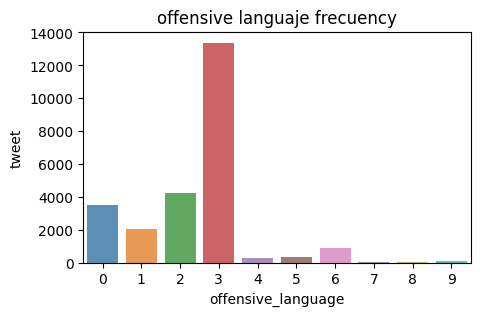

In [17]:
plt.figure(figsize=(5,3))
sns.barplot(data =tweet_by_polarity, x = "offensive_language", y = "tweet", alpha=0.8)
plt.title('offensive languaje frecuency')
plt.show()

## 7. 3 Uso de palabras en tweets

In [18]:
words = {}
for row in tqdm(data_raw['tweet']):
    if isinstance(row, str):  # Verificar si es una cadena de texto
        doc = nlp(row.lower())
        for token in doc:
            if token.is_alpha and not token.is_stop:
                if token.text in words:
                    num_temp = int(words[token.text])
                    words[token.text] = num_temp + 1
                else:
                    words[token.text] = 1



100%|██████████| 24783/24783 [04:25<00:00, 93.35it/s] 


In [19]:
df_words = pd.DataFrame([[key, words[key]] for key in words.keys()], columns=['Word', 'Freq'])
df_words.sort_values('Freq')
df_words = df_words[:100]
df_words.head(100)

,Word,Freq
0,rt,7580
1,woman,101
2,you,6095
3,t,3780
4,complain,27
...,...,...
95,everyone,93
96,lol,1055
97,walked,22
98,into,245


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [20]:
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [21]:
import circlify
# compute circle positions:
circles = circlify.circlify(df_words['Freq'][0:30].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
n = df_words['Freq'][0:30].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

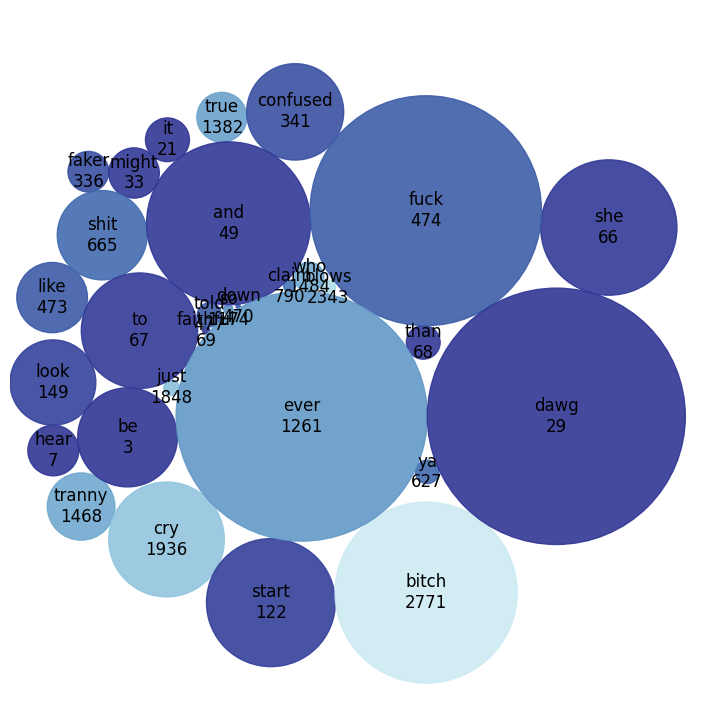

In [22]:
fig, ax = plt.subplots(figsize=(9,9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(df_words['Word'][0:60])
counts = list(df_words['Freq'][0:70])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
    plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
pos_freq = {}
for row in tqdm(data_raw['tweet'].to_list()):
    doc = nlp(row.lower())
    for token in doc:
        if token.pos_ in pos_freq:
            value = pos_freq[token.pos_]
            pos_freq[token.pos_] = value + 1
        else:
            pos_freq[token.pos_] =  1

100%|██████████| 24783/24783 [03:47<00:00, 108.92it/s]


In [24]:
df_pos = pd.DataFrame([[key, pos_freq[key]] for key in pos_freq.keys()], columns=['POS', 'Freq'])
df_pos.sort_values('Freq').tail(15)
df_pos = df_pos[:20]
df_pos.head(10)

,POS,Freq
0,PUNCT,50042
1,PROPN,54087
2,NOUN,61410
3,AUX,8276
4,X,162775
5,VERB,25961
6,ADJ,22889
7,CCONJ,7950
8,ADV,6595
9,ADP,10337


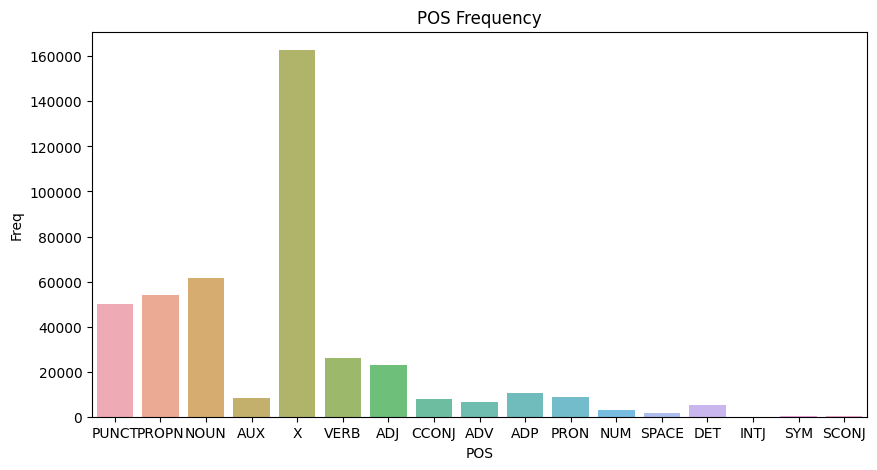

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data = df_pos, x = 'POS', y = 'Freq', alpha=0.8)
plt.title('POS Frequency')
plt.show()

# 8. Preprocesamiento

In [26]:
def processing(text: str):
    result = ''
    try:
        text = unicodedata.normalize('NFD', text)
        text = text.encode('ascii', 'ignore')
        text_out = text.decode("utf-8")
        text_out = text_out.lower()
        text_out = re.sub("[\U0001f000-\U000e007f]", 'EMOJI', text_out)
        text_out = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+'
                          r'|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))',
                          'URL', text_out)
        text_out = re.sub("@([A-Za-z0-9_]{1,40})", 'MENTION', text_out)
        text_out = re.sub("#([A-Za-z0-9_]{1,40})", 'HASTAG', text_out)
        # Remove patterns
        
        text_out = re.sub(r'\©|\×|\⇔|\_|\»|\«|\~|\#|\$|\€|\Â|\�|\¬', '', text_out)
        text_out = re.sub(r'\,|\;|\:|\!|\¡|\’|\‘|\”|\“|\"|\'|\`', '', text_out)
        text_out = re.sub(r'\}|\{|\[|\]|\(|\)|\<|\>|\?|\¿|\°|\|', '', text_out)
        text_out = re.sub(r'\/|\-|\+|\*|\=|\^|\%|\&|\$', '', text_out)
        text_out = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text_out)
        text_out = re.sub(r'[0-9]', '', text_out)
        text_out = re.sub(r'\s+', ' ', text_out).strip()
        text_out = text_out.rstrip()
        result = text_out if text_out != ' ' else None
    except Exception as e:
        print('Error processing: {0}'.format(e))
    return result

In [84]:
messages = [processing(row) for row in data_raw['tweet'].tolist()]
messages

['rt MENTION as a woman you shouldnt complain about cleaning up your house. amp as a man you should always take the trash out...',
 'rt MENTION boy dats cold...tyga dwn bad for cuffin dat hoe in the st place',
 'rt MENTION dawg rt MENTION you ever fuck a bitch and she start to cry you be confused as shit',
 'rt MENTION MENTION she look like a tranny',
 'rt MENTION the shit you hear about me might be true or it might be faker than the bitch who told it to ya HASTAG',
 'MENTION the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes HASTAGHASTAGHASTAG',
 'MENTION i can not just sit up and hate on another bitch .. i got too much shit going on',
 'HASTAGMENTION cause im tired of you big bitches coming for us skinny girlsHASTAG',
 'amp you might not get ya bitch back amp thats that',
 'MENTION hobbies include fighting mariam bitch',
 'keeks is a bitch she curves everyone lol i walked into a conversation like this. smh',
 'murda gang bitch its gang lan

In [85]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [86]:
bow = CountVectorizer(analyzer='word', ngram_range=(1, 3), stop_words= stop_words)

In [87]:
bow.fit(messages)

CountVectorizer(ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [88]:
x = bow.transform(messages).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df = pd.DataFrame(x, index=['tweet '+str(i) for i in range(1, 1+len(messages))])
df.round(1)

In [53]:
y = data_raw['tweet']
y

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [54]:
Counter(y)

Counter({"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...": 1,
         '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!': 1,
         '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit': 1,
         '!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny': 1,
         '!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;': 1,
         '!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"': 1,
         '!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"': 1,
         "!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming f

In [ ]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [56]:
Counter(y)

Counter({"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...": 1,
         '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!': 1,
         '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit': 1,
         '!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny': 1,
         '!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;': 1,
         '!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"': 1,
         '!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"': 1,
         "!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming f

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [59]:
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs")

In [ ]:
softmax.fit(x_train, y_train)

In [ ]:
y_predict = softmax.predict(x_test)
y_predict

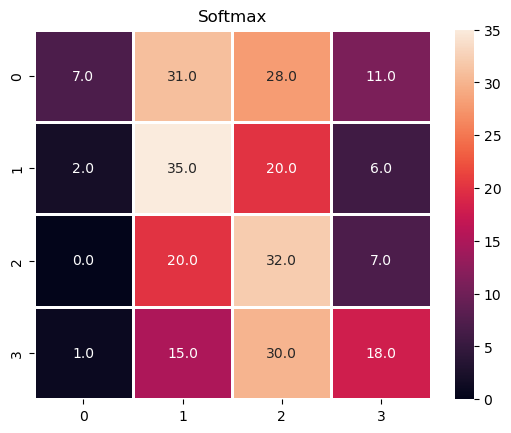

In [ ]:
cm = confusion_matrix(y_test, y_predict)
plt.figure()
sns.heatmap(cm , annot =True, linewidth=0.8,fmt=".1f")
plt.title("Softmax")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
f1 = f1_score(y_test, y_predict, average="macro")
precision = precision_score(y_test, y_predict, average="macro")
recall = recall_score(y_test, y_predict, average="macro")
accuracy = accuracy_score(y_test, y_predict, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)